In [218]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

## CS418 Data Science Final Project

### Names: Abhi Shah, Brian De Villa,  Katherine Misyutina, Matthew Jankowski

#### Dataset Topic:
Child Mortality for children under the age of 5. Compare different countries and diseases. Show differences between devloped and devloping countries.

#### Criteria:
In early April (exact date to be announced) you must submit your progress report. Your progress report must contain the following:

    1)An introduction part to your data:
        * Data spec: describe your data. Include the format and any assumptions about your data, size of the dataset
        * A link to your full data in downloadable form, you can keep your data on Google Drive, Box, DropBox, GitHub, or personal website
        * A sample of your data ( n = 10 - 50)
        * A report of your data collection process
            * How did you collect your data
            * How did you clean your data
            * Mention any difficulties you faced in the beginning steps
2) A summary of challenges and observations you have made so far. 
A brief mention of your next steps and what you plan to do with your data as you move into the analysis (If you are already in the analysis phase you can mention that as well)
Group member duties





<h1> Loading Cleaned Data </h2>
Load in all the data was cleaned

In [219]:
dfPopulation = pd.read_csv('../datasets/CleanedPopulation/Clean_population.csv')
dfPopulation2 = pd.read_csv('../datasets/CleanedPopulation/Clean_population.csv', index_col=0)
dfAcute_Lower_Respiratory_infections = pd.read_csv('../datasets/CleanedDiseases/CleanedAcute_Lower_Respiratory_infections.csv')
dfInjuries = pd.read_csv('../datasets/CleanedDiseases/CleanedInjuries.csv')
dfMeasles_mortality = pd.read_csv('../datasets/CleanedDiseases/Cleanedmeasles_mortality.csv')
dfPrematurity = pd.read_csv('../datasets/CleanedDiseases/CleanedPrematurity.csv')
dfSepsis = pd.read_csv('../datasets/CleanedDiseases/CleanedSepsis.csv')
dfGDP = pd.read_csv('../datasets/CleanedGDP/Clean_gdp2.csv', index_col=0)
dfGDP2 = pd.read_csv('../datasets/CleanedGDP/Clean_gdp2.csv')

<h1> Calculations </h2>
Gets the pecent of the diseased children over the total population of the country during that year.
It also gets the difference of GDP from 2000 to 2015.

In [220]:
#calculates the percent of diseases over the total population for each country in each year
acute_lower_respiratory_infection_percentage = (dfAcute_Lower_Respiratory_infections.iloc[:, 1:5]/(dfPopulation.iloc[:,1:5] * 1000)) * 100
injuries_percentage = (dfInjuries.iloc[:, 1:5]/(dfPopulation.iloc[:,1:5] * 1000)) * 100
measles_mortality_percentage = (dfMeasles_mortality.iloc[:, 1:5]/(dfPopulation.iloc[:,1:5] * 1000)) * 100
prematurity_percentage = (dfPrematurity.iloc[:, 1:5]/(dfPopulation.iloc[:,1:5] * 1000)) * 100
sepsis_percentage = (dfSepsis.iloc[:, 1:5]/(dfPopulation.iloc[:, 1:5] * 1000)) * 100
gdp_difference_percentage = (dfGDP['2015']/dfGDP['2000']) * 100

<h1> Functions to help with plotting </h1>
In here there will be 2 functions. One to create the percentages dataframe and another to sort the percentages.
These functions will help later on to plot in the way we want to plot.

In [221]:
#makes some empty dataframes to be used
dfAcute_percentage = pd.DataFrame(columns =['Countries', '2000', '2005', '2010', '2015'])
dfInjuries_percentage = pd.DataFrame(columns =['Countries', '2000', '2005', '2010', '2015'])
dfMeasles_percentage = pd.DataFrame(columns =['Countries', '2000', '2005', '2010', '2015'])
dfPrematurity_percentage = pd.DataFrame(columns =['Countries', '2000', '2005', '2010', '2015'])
dfSepsis_percentage = pd.DataFrame(columns =['Countries', '2000', '2005', '2010', '2015'])
dfGDP_difference_percentage = pd.DataFrame(columns = ['GDP 2015/2000'])
#creates a dataset that combines both countries name and newly made percentages
def createPercentageDataframe(tempDF, percentageDF, countriesDataFrame):

    tempDF['Countries'] = countriesDataFrame
    for year in percentageDF:
        tempDF[year] = percentageDF[str(year)]
    
createPercentageDataframe(dfAcute_percentage, acute_lower_respiratory_infection_percentage, dfAcute_Lower_Respiratory_infections.iloc[:, 0])
createPercentageDataframe(dfInjuries_percentage, injuries_percentage, dfAcute_Lower_Respiratory_infections.iloc[:, 0])
createPercentageDataframe(dfMeasles_percentage, measles_mortality_percentage, dfAcute_Lower_Respiratory_infections.iloc[:, 0])
createPercentageDataframe(dfPrematurity_percentage, prematurity_percentage, dfAcute_Lower_Respiratory_infections.iloc[:, 0])
createPercentageDataframe(dfSepsis_percentage, sepsis_percentage, dfAcute_Lower_Respiratory_infections.iloc[:, 0])
dfGDP_difference_percentage['GDP 2015/2000'] = gdp_difference_percentage
#sorts the created diseases percentage countries names and population dataset countries names in the same way
#so when we plot all indexes line up.
def sortingByPercentage(percentageDataF, dfPopulation):
    percentageDataF = percentageDataF.sort_values(by=['2000','2005','2010','2015'])
    dfPopulation['country'] = pd.Categorical(dfPopulation['country'], percentageDataF['Countries'])
    dfPopulation = dfPopulation.sort_values('country')
    
    return percentageDataF, dfPopulation

<h1> Create Population Graph </h1>
Creates a population bar graph for each country

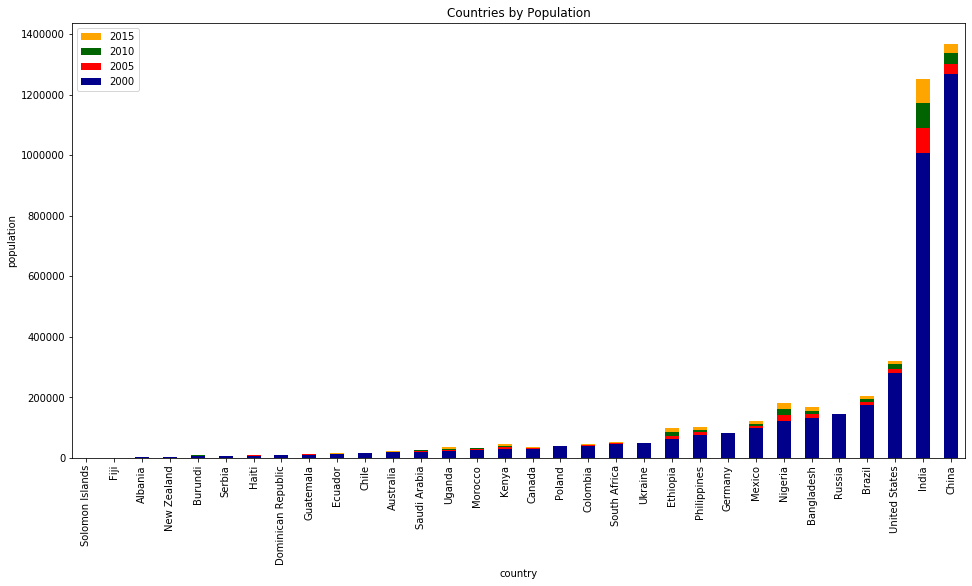

In [222]:
dfPopulation2 = dfPopulation2.sort_values(by=['2000', '2005', '2010', '2015'])
_, ax = plt.subplots()
dfPopulation2['2015'].plot(kind='bar', ax=ax, color='Orange',figsize=(16,8),legend=True)
dfPopulation2['2010'].plot(kind='bar', ax=ax, color='DarkGreen',legend=True)
dfPopulation2['2005'].plot(kind='bar', ax=ax, color='Red',legend=True)
dfPopulation2['2000'].plot(kind='bar', ax=ax, color='DarkBlue',legend=True)
plt.title('Countries by Population')
plt.xlabel('country')
plt.ylabel('population')
plt.show();

<h1> Create GDP graph </h1>
Creates a gdp bar graph for each country for the given country(2000, 2005, 2010, 2015)

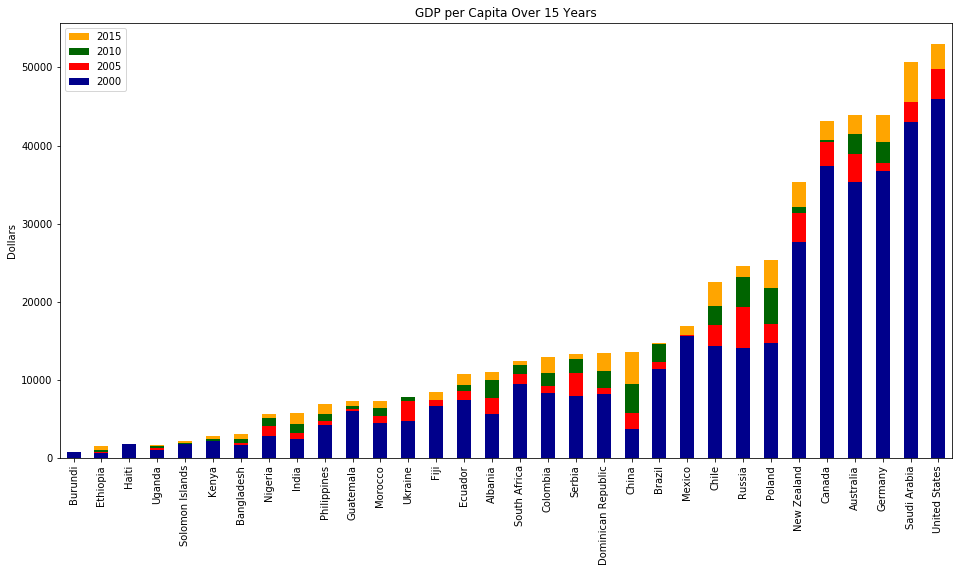

In [223]:
dfGDP = dfGDP.sort_values(by=['2015','2010','2005','2000'])
_, ax = plt.subplots()
dfGDP['2015'].plot(kind='bar', ax=ax, color='Orange',figsize=(16,8),legend=True)
dfGDP['2010'].plot(kind='bar', ax=ax, color='DarkGreen',legend=True)
dfGDP['2005'].plot(kind='bar', ax=ax, color='Red',legend=True)
dfGDP['2000'].plot(kind='bar', ax=ax, color='DarkBlue',legend=True)
plt.title("GDP per Capita Over 15 Years")
plt.xlabel("")
plt.ylabel("Dollars")
plt.show();

<h1> Create Disease Graphs </h2>
Creates graphs for each of the diseases per country during the years choosen(2000, 2005, 2010, 2015)


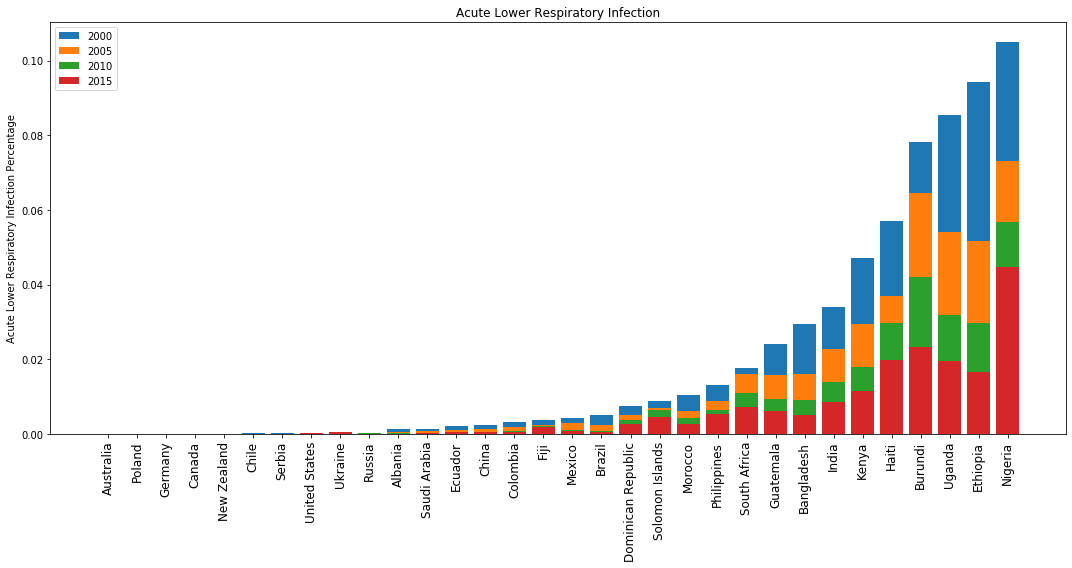

In [224]:
plt.figure(1, figsize = (15,8))
dfAcute_percentage, dfPopulation = sortingByPercentage(dfAcute_percentage, dfPopulation)
plt.bar(dfPopulation.iloc[:, 0], dfAcute_percentage.iloc[:, 1])
plt.bar(dfPopulation.iloc[:, 0], dfAcute_percentage.iloc[:, 2])
plt.bar(dfPopulation.iloc[:, 0], dfAcute_percentage.iloc[:, 3])
plt.bar(dfPopulation.iloc[:, 0], dfAcute_percentage.iloc[:, 4])
plt.title("Acute Lower Respiratory Infection")
plt.xticks(rotation = 90)
plt.ylabel("Acute Lower Respiratory Infection Percentage")
plt.legend(["2000", "2005", "2010","2015"])
plt.tick_params(axis = 'x', labelsize =12)
plt.tight_layout()
plt.show();

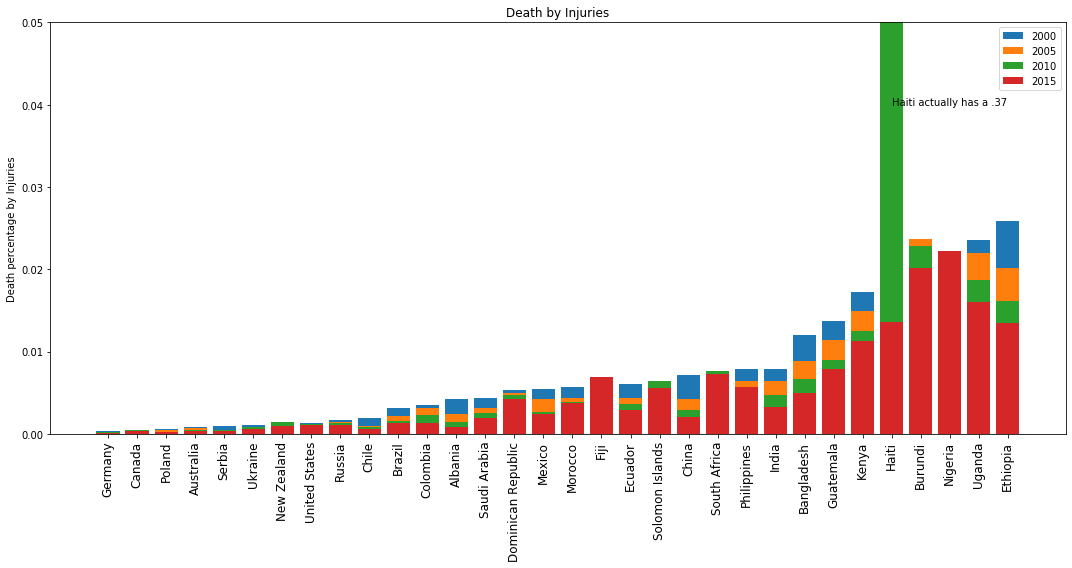

In [225]:
plt.figure(2, figsize = (15,8))
dfInjuries_percentage, dfPopulation = sortingByPercentage(dfInjuries_percentage, dfPopulation)
plt.bar(dfPopulation.iloc[:, 0], dfInjuries_percentage.iloc[:, 1])
plt.bar(dfPopulation.iloc[:, 0], dfInjuries_percentage.iloc[:, 2])
plt.bar(dfPopulation.iloc[:, 0], dfInjuries_percentage.iloc[:, 3])
plt.bar(dfPopulation.iloc[:, 0], dfInjuries_percentage.iloc[:, 4])
plt.title("Death by Injuries")
plt.xticks(rotation = 90)
plt.ylabel("Death percentage by Injuries")
plt.ylim(0, .05)
plt.legend(["2000", "2005", "2010","2015"])
plt.tick_params(axis = 'x', labelsize =12)
plt.tight_layout()
plt.text("Haiti", .04, "Haiti actually has a .37", horizontalalignment='left')
plt.show();

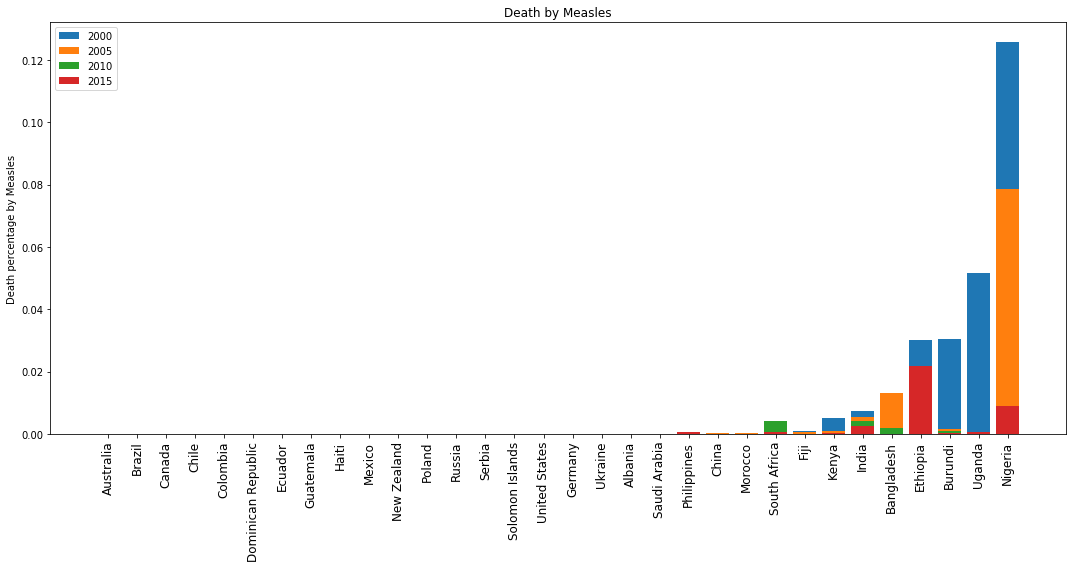

In [226]:
plt.figure(3, figsize = (15,8))
dfMeasles_percentage, dfPopulation = sortingByPercentage(dfMeasles_percentage, dfPopulation)
plt.bar(dfPopulation.iloc[:, 0], dfMeasles_percentage.iloc[:, 1])
plt.bar(dfPopulation.iloc[:, 0], dfMeasles_percentage.iloc[:, 2])
plt.bar(dfPopulation.iloc[:, 0], dfMeasles_percentage.iloc[:, 3])
plt.bar(dfPopulation.iloc[:, 0], dfMeasles_percentage.iloc[:, 4])
plt.title("Death by Measles")
plt.xticks(rotation = 90)
plt.ylabel("Death percentage by Measles")
plt.legend(["2000", "2005", "2010","2015"])
plt.tick_params(axis = 'x', labelsize =12)
plt.tight_layout()
plt.show();

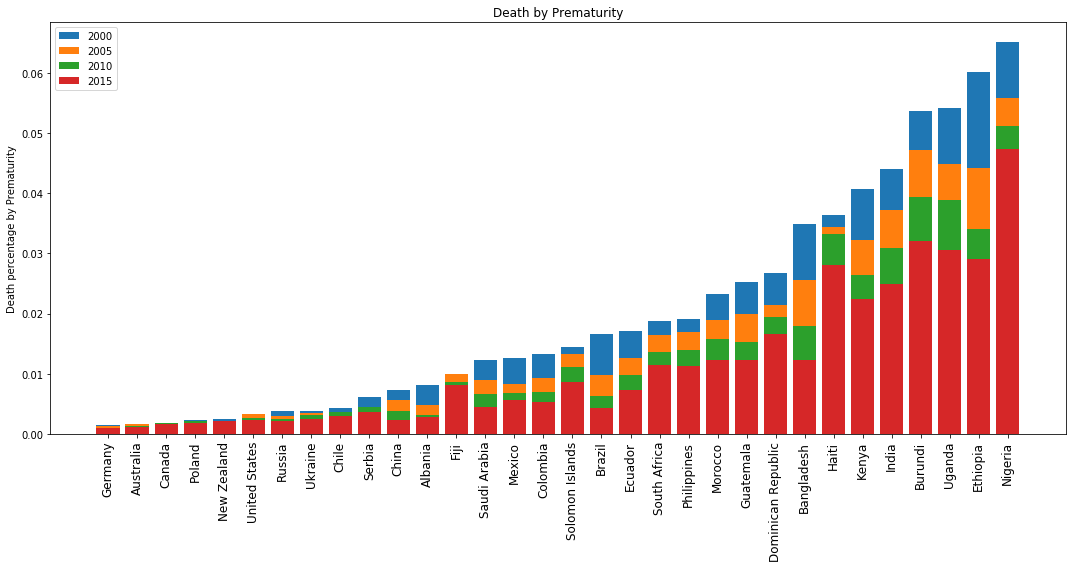

In [227]:
plt.figure(4, figsize = (15,8))
dfPrematurity_percentage, dfPopulation = sortingByPercentage(dfPrematurity_percentage, dfPopulation)
plt.bar(dfPopulation.iloc[:, 0], dfPrematurity_percentage.iloc[:, 1])
plt.bar(dfPopulation.iloc[:, 0], dfPrematurity_percentage.iloc[:, 2])
plt.bar(dfPopulation.iloc[:, 0], dfPrematurity_percentage.iloc[:, 3])
plt.bar(dfPopulation.iloc[:, 0], dfPrematurity_percentage.iloc[:, 4])
plt.title("Death by Prematurity")
plt.xticks(rotation = 90)
plt.ylabel("Death percentage by Prematurity")
plt.legend(["2000", "2005", "2010","2015"])
plt.tick_params(axis = 'x', labelsize =12)
plt.tight_layout()
plt.show();

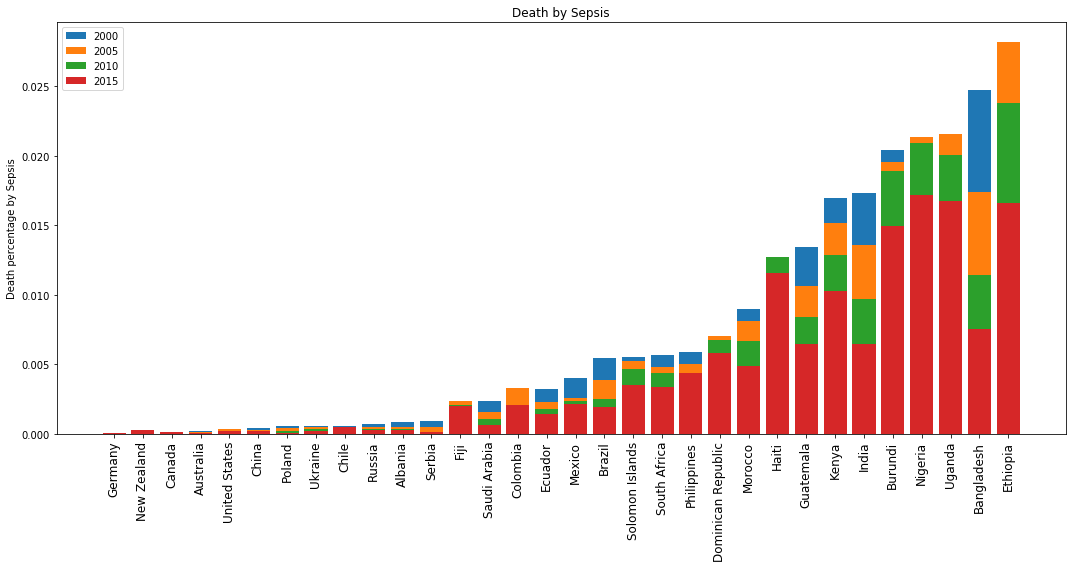

In [228]:
plt.figure(5, figsize = (15,8))
dfSepsis_percentage, dfPopulation = sortingByPercentage(dfSepsis_percentage, dfPopulation)
plt.bar(dfPopulation.iloc[:, 0], dfSepsis_percentage.iloc[:, 1])
plt.bar(dfPopulation.iloc[:, 0], dfSepsis_percentage.iloc[:, 2])
plt.bar(dfPopulation.iloc[:, 0], dfSepsis_percentage.iloc[:, 3])
plt.bar(dfPopulation.iloc[:, 0], dfSepsis_percentage.iloc[:, 4])
plt.title("Death by Sepsis")
plt.xticks(rotation = 90)
plt.ylabel("Death percentage by Sepsis")
plt.legend(["2000", "2005", "2010","2015"])
plt.tick_params(axis = 'x', labelsize =12)
plt.tight_layout()
plt.show();

<h1> GDP Increase 2000-2015 </h1>
This shows the gdp difference from 2000 to 2015

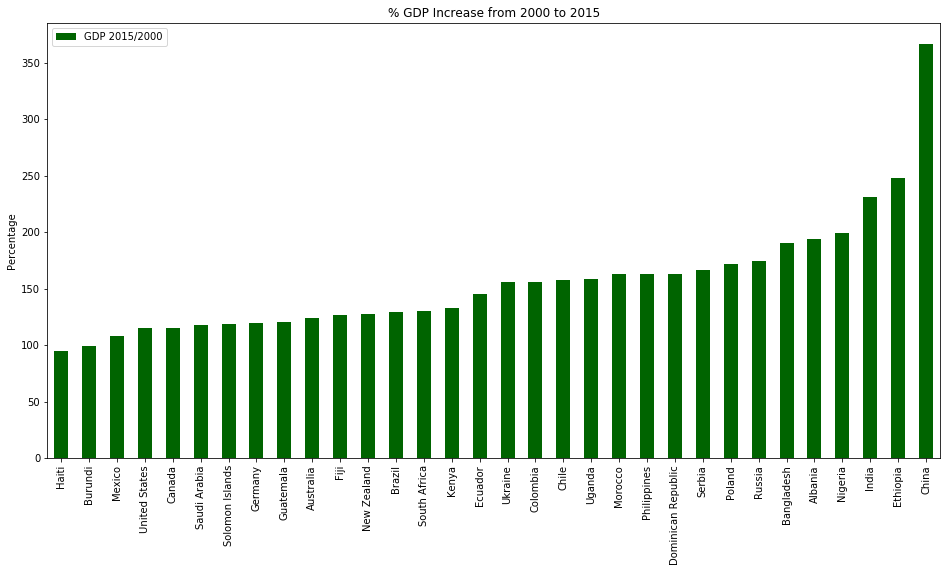

In [229]:
dfGDP_difference_percentage = dfGDP_difference_percentage.sort_values(by=['GDP 2015/2000'])
_, ax = plt.subplots()
dfGDP_difference_percentage['GDP 2015/2000'].plot(kind='bar', ax=ax, color='darkgreen',figsize=(16,8),legend=True)
plt.title("% GDP Increase from 2000 to 2015")
plt.xlabel("")
plt.ylabel("Percentage")
plt.show();


<h1> Merge datasets </h1>
This section merges the datasets into the format we want to do some calculations on it

In [230]:
merged2015 = pd.DataFrame()
merged2010 = pd.DataFrame()
merged2005 = pd.DataFrame()
merged2000 = pd.DataFrame()
#If year == 2015, indexOfYear = 4
#If year == 2010, indexOfYear = 3
#If year == 2005, indexOfyear = 2
#If year == 2000, indexOfyear = 1
#function that merges the year wanted and gdp into one dataframe
def dfGdpAndDisease(year, popYear, gdpYear, acuteYear, injuriesYear, measlesYear, prematurityYear, sepsisYear, indexOfYear, merged):
    #reads in only the year column we want
    popYear = popYear.iloc[:,[0,indexOfYear]]
    gdpYear = gdpYear.iloc[:,[0,indexOfYear]]
    acuteYear = acuteYear.iloc[:, [0,indexOfYear]]
    injuriesYear = injuriesYear.iloc[:,[0,indexOfYear]]
    measlesYear = measlesYear.iloc[:,[0, indexOfYear]]
    prematurityYear = prematurityYear.iloc[:,[0, indexOfYear]]
    sepsisYear = sepsisYear.iloc[:,[0, indexOfYear]]

    #then renames the columns inside of it
    popYear.rename(columns={year : 'population (K)'}, inplace=True)
    gdpYear.rename(columns={'Country' : 'country', year : 'GDP'}, inplace=True)
    gdpYear.GDP = gdpYear.GDP.astype(int)
    acuteYear.rename(columns={'Countries' : 'country', year : 'acute_deaths'}, inplace=True)
    injuriesYear.rename(columns={'Countries' : 'country', year : 'injuries_deaths'}, inplace=True)
    measlesYear.rename(columns={'Countries' : 'country', year : 'measles_deaths'}, inplace=True)
    prematurityYear.rename(columns={'Countries' : 'country', year :'prematurity_deaths'}, inplace=True)
    sepsisYear.rename(columns={'Countries' : 'country', year : 'sepsis_deaths'}, inplace=True)

    #merge them into one dataset
    merged = pd.merge(popYear, gdpYear, on='country', how='inner')
    merged = pd.merge(merged, acuteYear, on='country', how='inner')
    merged = pd.merge(merged, injuriesYear, on='country', how='inner')
    merged = pd.merge(merged, measlesYear, on='country', how='inner')
    merged = pd.merge(merged, prematurityYear, on='country', how='inner')
    merged = pd.merge(merged, sepsisYear, on='country', how='inner')

    return merged

merged2015 = dfGdpAndDisease('2015', dfPopulation, dfGDP2, dfAcute_Lower_Respiratory_infections, dfInjuries, dfMeasles_mortality, dfPrematurity, dfSepsis, 4, merged2015)
merged2010 = dfGdpAndDisease('2010', dfPopulation, dfGDP2, dfAcute_Lower_Respiratory_infections, dfInjuries, dfMeasles_mortality, dfPrematurity, dfSepsis, 3, merged2010)
merged2005 = dfGdpAndDisease('2005', dfPopulation, dfGDP2, dfAcute_Lower_Respiratory_infections, dfInjuries, dfMeasles_mortality, dfPrematurity, dfSepsis, 2, merged2010)
merged2000 = dfGdpAndDisease('2000', dfPopulation, dfGDP2, dfAcute_Lower_Respiratory_infections, dfInjuries, dfMeasles_mortality, dfPrematurity, dfSepsis, 1, merged2000)

<h1> Calculate the Death per Million </h2>
This section does calculations based on the dataset that was gotten from above

In [231]:
#calculations for death per million of total population
def deathPerMillion(mergedYear):
    #divide by population to get real feel of disease badness
    mergedYear['acute_deaths']    = mergedYear['acute_deaths'] / (mergedYear['population (K)']/1000)  #deaths per million of total population
    mergedYear['injuries_deaths'] = mergedYear['injuries_deaths'] / (mergedYear['population (K)']/1000) 
    mergedYear['measles_deaths']  = mergedYear['measles_deaths'] / (mergedYear['population (K)']/1000) 
    mergedYear['prematurity_deaths'] = mergedYear['prematurity_deaths'] / (mergedYear['population (K)']/1000) 
    mergedYear['sepsis_deaths']   = mergedYear['sepsis_deaths'] / (mergedYear['population (K)']/1000) 

    #sort by GDP
    mergedYear = mergedYear.sort_values(by=['GDP'])

    #multiply GDP by a factor to show proportion
    mergedYear['GDP'] = mergedYear['GDP'] / 120

    return mergedYear

merged2015 = deathPerMillion(merged2015)
merged2010 = deathPerMillion(merged2010)
merged2005 = deathPerMillion(merged2005)
merged2000 = deathPerMillion(merged2000)

#sorts xaxis to be the same as 2015 to be able to keep it consistent
def sortXaxis(exampleXaxisDF, changingxAxisDF):
    changingxAxisDF['country'] = pd.Categorical(changingxAxisDF['country'], exampleXaxisDF['country'])
    changingxAxisDF = changingxAxisDF.sort_values('country')

    return changingxAxisDF

merged2010 = sortXaxis(merged2015, merged2010)
merged2005 = sortXaxis(merged2015, merged2005)
merged2000 = sortXaxis(merged2015, merged2000)



<h1> GDP vs Diseases </h2>
This section will focus on making a correlation between GDP and the diseases through a scatter plot.
Hopefully by graphing this it will be easier to answer our questions and hypothesis. 

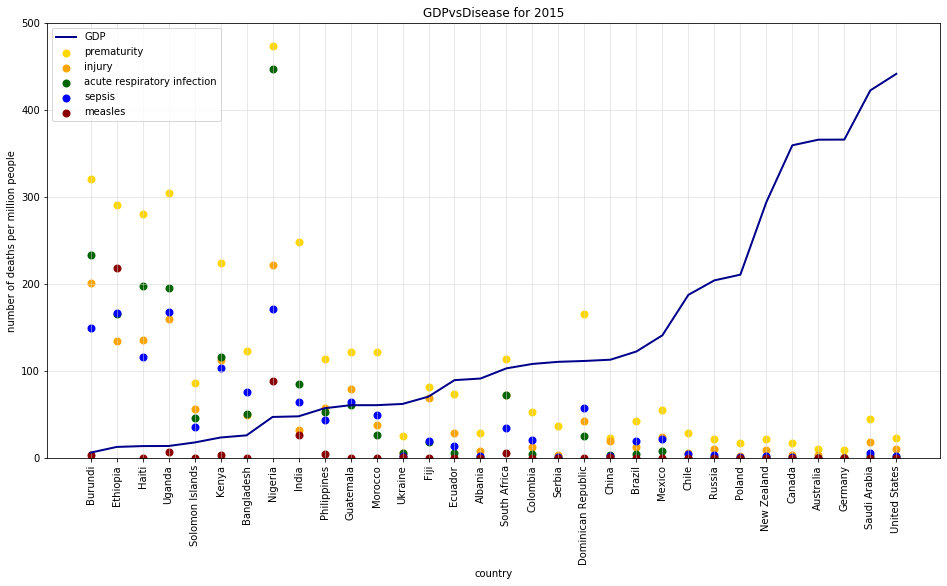

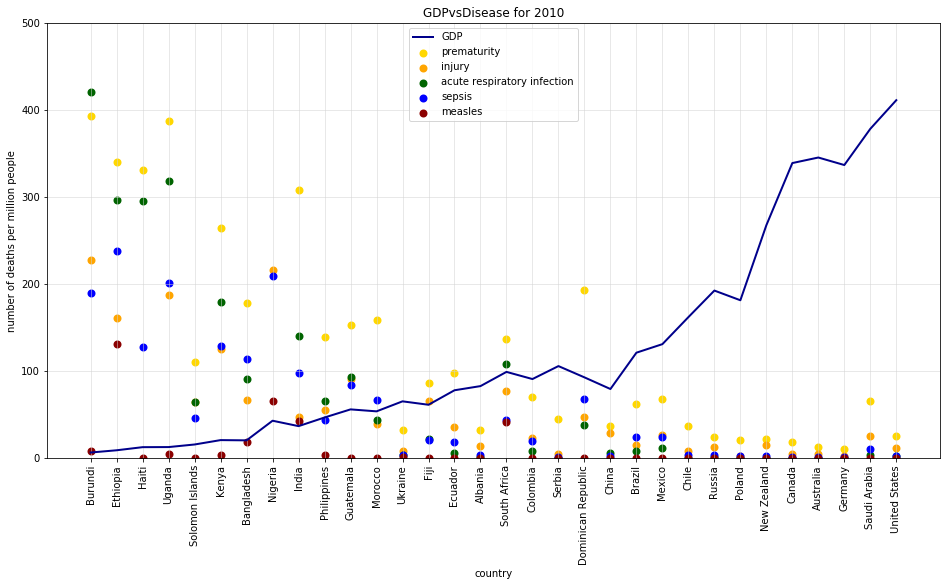

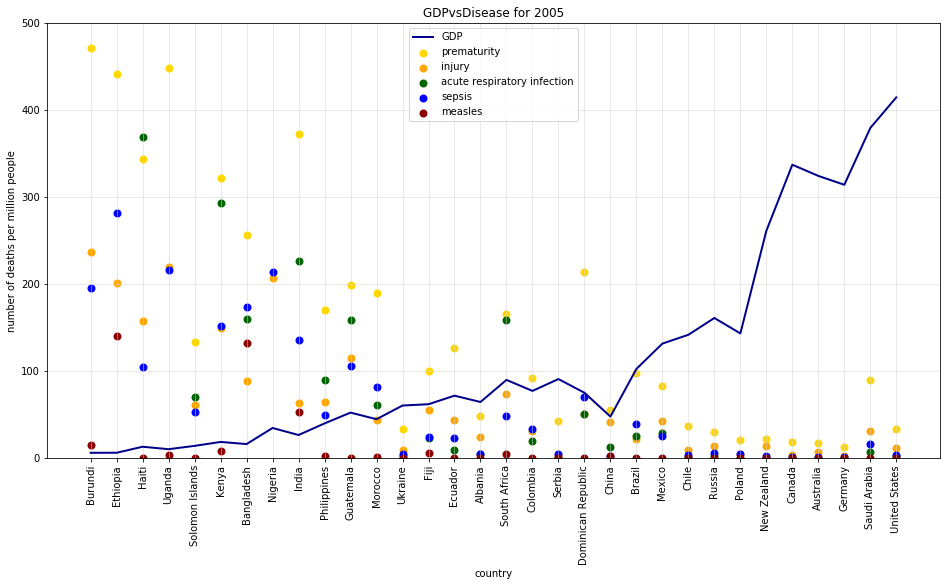

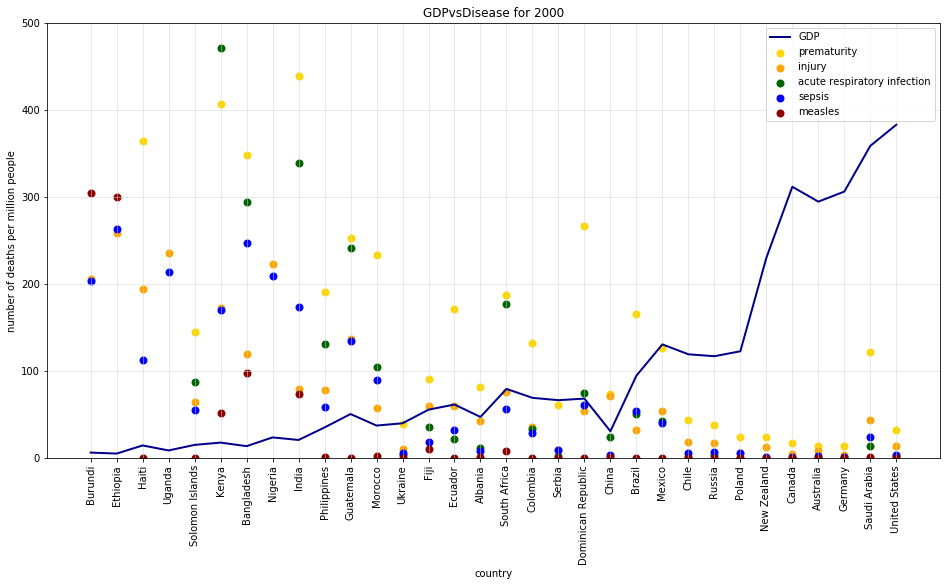

In [235]:


#plot to show GDPvsDisease
def plotGDPvsDisease(mergedYear,counter, year):
    plt.figure(counter, figsize=(16,8))
    plt.plot('country', 'GDP', data=mergedYear, color='darkblue', linewidth=2, label="GDP")
    plt.scatter('country', 'prematurity_deaths', data=mergedYear, color='gold', linewidth=2, label="prematurity")
    plt.scatter('country', 'injuries_deaths', data=mergedYear, color='orange', linewidth=2, label="injury")
    plt.scatter('country', 'acute_deaths', data=mergedYear, color='darkgreen', linewidth=2, label="acute respiratory infection")
    plt.scatter('country', 'sepsis_deaths', data=mergedYear, color='blue', linewidth=2, label="sepsis")
    plt.scatter('country', 'measles_deaths', data=mergedYear, color='darkred', linewidth=2, label="measles")
    plt.title("GDPvsDisease for " + year)
    plt.xlabel('country')
    plt.ylabel('number of deaths per million people')
    plt.legend(loc='center')
    plt.grid(linestyle='-', linewidth='0.5', color='lightgray')
    plt.xticks(rotation = 90)
    plt.legend()
    plt.ylim(0,500)
    plt.show();

plotGDPvsDisease(merged2015, 1, '2015');
plotGDPvsDisease(merged2010, 2, '2010');
plotGDPvsDisease(merged2005, 3, '2005');
plotGDPvsDisease(merged2000, 4, '2000');
